In [1]:
import warnings
warnings.filterwarnings('ignore')

# For number crunching and data management:
import numpy as np
import pandas as pd
from IPython.display import display

# For plotting:
#import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For manipulating date/time stamps
import time

In [2]:
!rm -f temperatures-us-cities.csv  # get a fresh copy
!curl -O -L https://github.com/rvuduc/cs1100/raw/master/temperatures-us-cities.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0147    0     0     67      0  0:00:02  0:00:02 --:--:--    87
100 45.2M  100 45.2M    0     0   780k      0  0:00:59  0:00:59 --:--:--  892kM    0     0   770k      0  0:01:00  0:00:54  0:00:06  857k


In [3]:
import pandas as pd
data = pd.read_csv("temperatures-us-cities.csv")
data.head(10)

,dt,AverageTemperatureC,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
1,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
2,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
3,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
4,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W
5,1820-06-01,25.682,2.008,Abilene,United States,32.95N,100.53W
6,1820-07-01,26.268,1.802,Abilene,United States,32.95N,100.53W
7,1820-08-01,25.048,1.895,Abilene,United States,32.95N,100.53W
8,1820-09-01,22.435,2.216,Abilene,United States,32.95N,100.53W
9,1820-10-01,15.830,2.169,Abilene,United States,32.95N,100.53W


In [4]:
atl=data.loc[data["City"] == "Atlanta"]
atl.head()

,dt,AverageTemperatureC,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
34003,1743-11-01,8.13,2.245,Atlanta,United States,34.56N,83.68W
34004,1743-12-01,NaN,NaN,Atlanta,United States,34.56N,83.68W
34005,1744-01-01,NaN,NaN,Atlanta,United States,34.56N,83.68W
34006,1744-02-01,NaN,NaN,Atlanta,United States,34.56N,83.68W
34007,1744-03-01,NaN,NaN,Atlanta,United States,34.56N,83.68W


In [5]:
atl.dropna (inplace=True)
atl.head (10)

,dt,AverageTemperatureC,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
34003,1743-11-01,8.130,2.245,Atlanta,United States,34.56N,83.68W
34008,1744-04-01,16.160,2.126,Atlanta,United States,34.56N,83.68W
34009,1744-05-01,18.830,1.979,Atlanta,United States,34.56N,83.68W
34010,1744-06-01,23.078,1.883,Atlanta,United States,34.56N,83.68W
34011,1744-07-01,24.165,1.713,Atlanta,United States,34.56N,83.68W
34013,1744-09-01,18.939,2.004,Atlanta,United States,34.56N,83.68W
34014,1744-10-01,12.943,2.165,Atlanta,United States,34.56N,83.68W
34015,1744-11-01,8.495,2.097,Atlanta,United States,34.56N,83.68W
34016,1744-12-01,4.308,2.377,Atlanta,United States,34.56N,83.68W
34017,1745-01-01,4.403,2.602,Atlanta,United States,34.56N,83.68W


In [6]:
atl['year'] = ""
atl['year'] = atl.dt.str[:4]
atl.head()

,dt,AverageTemperatureC,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
34003,1743-11-01,8.130,2.245,Atlanta,United States,34.56N,83.68W,1743
34008,1744-04-01,16.160,2.126,Atlanta,United States,34.56N,83.68W,1744
34009,1744-05-01,18.830,1.979,Atlanta,United States,34.56N,83.68W,1744
34010,1744-06-01,23.078,1.883,Atlanta,United States,34.56N,83.68W,1744
34011,1744-07-01,24.165,1.713,Atlanta,United States,34.56N,83.68W,1744


In [13]:
atl_means=pd.DataFrame(columns=['year', 'AverageTemperatureC','AverageTemperatureUncertainty','degF','deltaF'])
atl_means.head()
atl_means['year']= atl.groupby(['year'])
atl_means['AverageTemperatureC']= atl.groupby(['year'])['AverageTemperatureC'].mean()
atl_means['AverageTemperatureUncertainty']= atl.groupby(['year'])['AverageTemperatureUncertainty'].mean()
atl_means['degF']= (atl_means.AverageTemperatureC*9/5)+32
atl_means['deltaF']= (atl_means.AverageTemperatureUncertainty*9/5)+32
atl_means.head()

StopIteration: 

StopIteration: 

ValueError: First argument must be a sequence

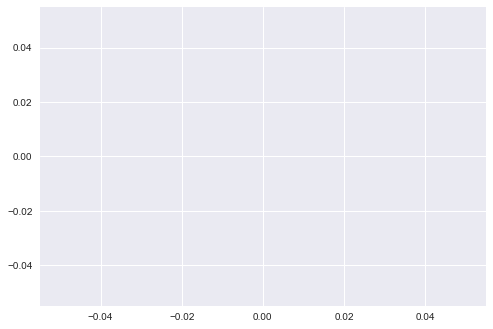

In [8]:
sns.regplot (x='year', y='degF', data=atl_means)